In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('Mall_Customers.csv')

df = df.rename(columns={'Annual Income (k$)': 'annual income (k$)', 'Spending Score (1-100)': 'spending score (1-100)'})

X = df[['annual income (k$)', 'spending score (1-100)']].values

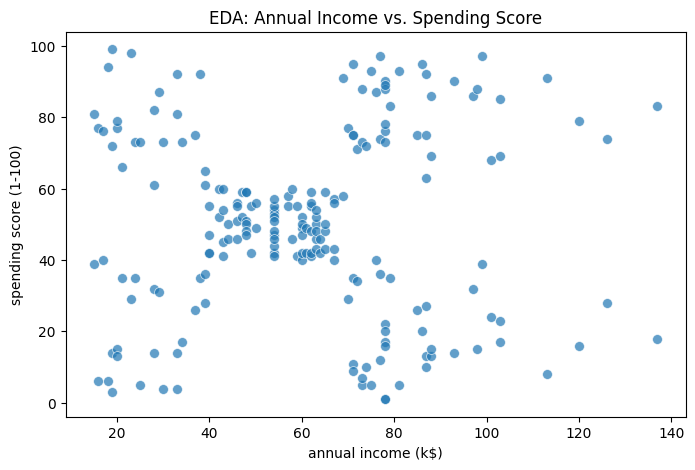

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='annual income (k$)', y='spending score (1-100)', s=50, alpha=0.7)
plt.title('EDA: Annual Income vs. Spending Score')
plt.show()

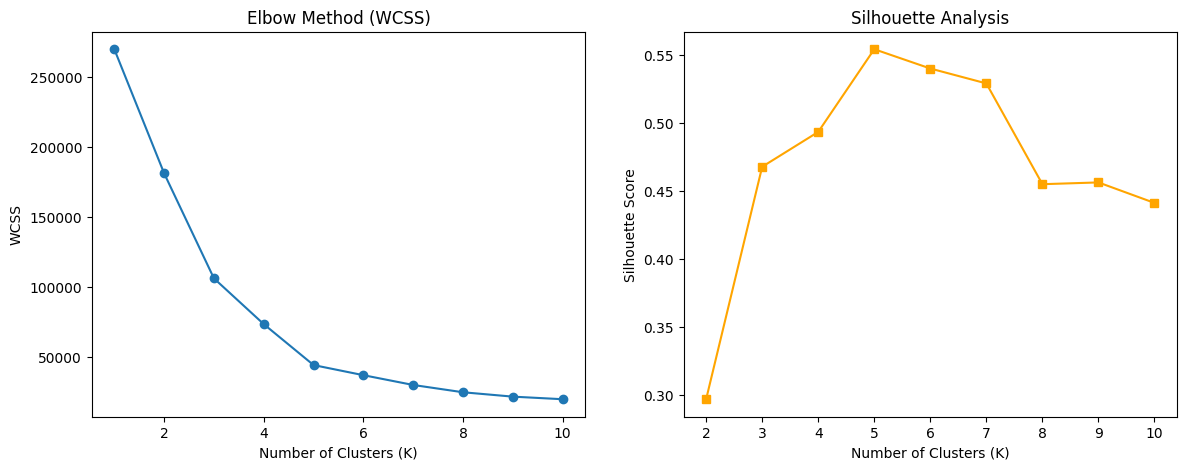

In [14]:
wcss = []
silhouette_scores = []
K_range = range(2, 11)

kmeans_1 = KMeans(n_clusters=1, init='k-means++', n_init=10, random_state=42)
kmeans_1.fit(X)
wcss.append(kmeans_1.inertia_)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(range(1, 11), wcss, marker='o')
ax1.set_title('Elbow Method (WCSS)')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('WCSS')

ax2.plot(K_range, silhouette_scores, marker='s', color='orange')
ax2.set_title('Silhouette Analysis')
ax2.set_xlabel('Number of Clusters (K)')
ax2.set_ylabel('Silhouette Score')
plt.show()

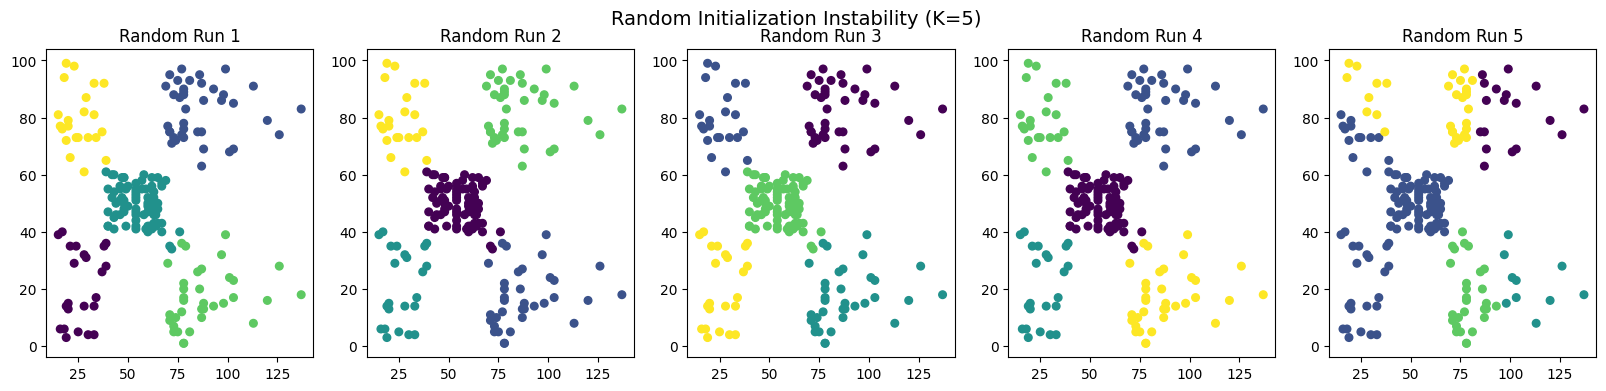

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle("Random Initialization Instability (K=5)", fontsize=14)

for i in range(5):
    kmeans_rand = KMeans(n_clusters=5, init='random', n_init=1, random_state=i)
    labels = kmeans_rand.fit_predict(X)
    axes[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    axes[i].set_title(f'Random Run {i+1}')
plt.show()

In [16]:
final_kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
df['Cluster'] = final_kmeans.fit_predict(X)

cluster_profiles = df.groupby('Cluster')[['annual income (k$)', 'spending score (1-100)']].mean().round(1)

def assign_marketing_label(row):
    income = row['annual income (k$)']
    spending = row['spending score (1-100)']

    if income < 40:
        income_cat = 'Low Income'
    elif income < 70:
        income_cat = 'Average Income'
    else:
        income_cat = 'High Income'

    if spending < 30:
        spending_cat = 'Low Spender'
    elif spending < 60:
        spending_cat = 'Average Spender'
    else:
        spending_cat = 'High Spender'

    if income_cat == 'High Income' and spending_cat == 'High Spender':
        desc_label = 'High Income / High Spending'
    elif income_cat == 'High Income' and spending_cat == 'Low Spender':
        desc_label = 'High Income / Low Spending'
    elif income_cat == 'Low Income' and spending_cat == 'High Spender':
        desc_label = 'Low Income / High Spending'
    elif income_cat == 'Low Income' and spending_cat == 'Low Spender':
        desc_label = 'Low Income / Low Spending'
    elif income_cat == 'Average Income' and spending_cat == 'Average Spender':
        desc_label = 'Mid Income / Mid Spending'
    else:
        desc_label = f'{income_cat} / {spending_cat}'

    return marketing_labels.get(desc_label, desc_label)

marketing_labels = {
    'High Income / High Spending': 'Luxury Loyalists',
    'High Income / Low Spending': 'Careful Savers',
    'Mid Income / Mid Spending': 'The Mainstream',
    'Low Income / High Spending': 'Impulse Shoppers',
    'Low Income / Low Spending': 'Budget Conscious'
}

cluster_profiles['Marketing Label'] = cluster_profiles.apply(assign_marketing_label, axis=1)

print("Final Cluster Profiles")
print(cluster_profiles)

Final Cluster Profiles
         annual income (k$)  spending score (1-100)   Marketing Label
Cluster                                                              
0                      55.3                    49.5    The Mainstream
1                      86.5                    82.1  Luxury Loyalists
2                      25.7                    79.4  Impulse Shoppers
3                      88.2                    17.1    Careful Savers
4                      26.3                    20.9  Budget Conscious
